<a href="https://colab.research.google.com/github/SubhanMirza56/Neural-Network/blob/main/handwritten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [20]:
mnist = mnist.load_data()

In [21]:
(x_train, y_train), (x_test, y_test) = mnist

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
x_test.shape

(10000, 28, 28)

In [24]:
y_train.shape

(60000,)

In [25]:
y_test.shape

(10000,)

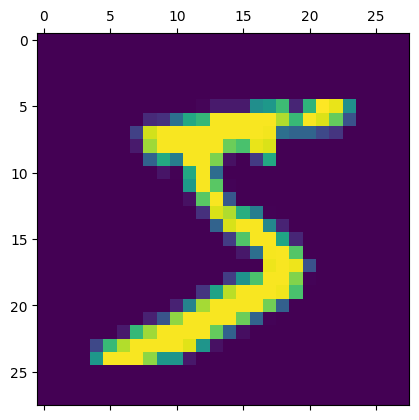

In [26]:
plt.matshow(x_train[0])

In [27]:
y_train[0]

np.uint8(5)

In [28]:
x_train = x_train.reshape(60000,28*28)
x_test  = x_test.reshape(10000,28*28)

In [29]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [30]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [31]:
np.dtype(type(x_train))

dtype('O')

In [32]:
x_train /= 255
x_test /= 255

In [33]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
y_train.shape

(60000,)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical

In [37]:
classes = 10
y_train = to_categorical(y_train,classes)
y_test = to_categorical(y_test,classes)

In [38]:
input_size = 784

batch_size = 64

epochs = 20

hidden1 = 128
hidden2 = 64

In [39]:
model = Sequential()
model.add(Dense(hidden1,activation='relu',input_shape=(input_size,)))
model.add(Dense(hidden2,activation='relu'))
model.add(Dense(classes,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
from time import time

start = time()
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
end = time()
print(f'Training time: {end-start}')

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8607 - loss: 0.4873 - val_accuracy: 0.9585 - val_loss: 0.1347
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9644 - loss: 0.1219 - val_accuracy: 0.9678 - val_loss: 0.1025
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9763 - loss: 0.0803 - val_accuracy: 0.9725 - val_loss: 0.0899
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9821 - loss: 0.0580 - val_accuracy: 0.9771 - val_loss: 0.0814
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9858 - loss: 0.0437 - val_accuracy: 0.9744 - val_loss: 0.0903
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9890 - loss: 0.0353 - val_accuracy: 0.9773 - val_loss: 0.0798
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9915 - loss: 0.0262 - val_accuracy: 0.9769 - val_loss: 0.0835
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9926 - loss: 0.0231 - val_accuracy: 0.

In [41]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

y_pred_probs = model.predict(x_test)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Accuracy: 0.9755


In [44]:
np.unique(y_pred)

array([0, 1])

In [49]:
mask = range(20,50)

X_valid = x_test[:10]
y_valid = y_test[:10]

y_pred_probs_valid  = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


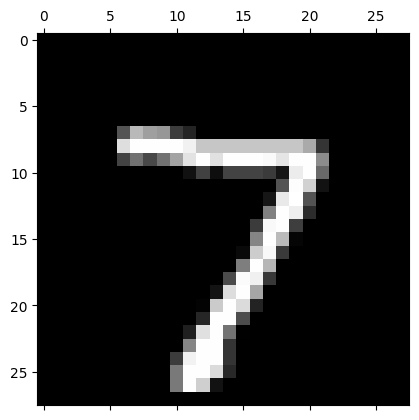

In [50]:
plt.matshow(X_valid[0].reshape(28,28))

In [51]:
n = len(X_valid)
n

10

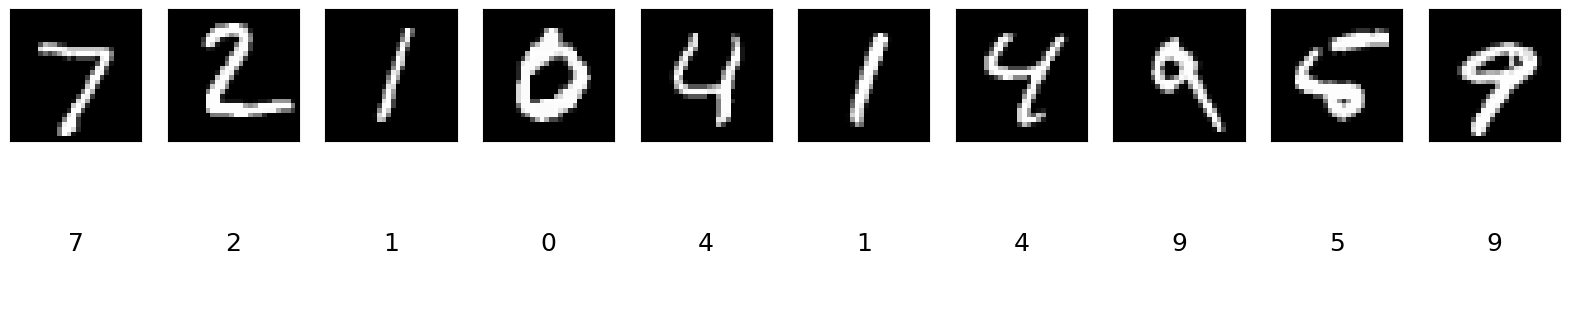

In [52]:
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1+n)
    plt.text(0.5,0.5,str(predicted_digit), fontsize=18 ,ha='center',va='center')
    plt.axis('off')
plt.show()
plt.close()